In [1]:
import pandas as pd
import numpy as np

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("E comm.xlsx")

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
df.shape

(5630, 20)

In [6]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
# Statistical summary
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [9]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-2270127726.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2270127726.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [10]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [11]:
df.shape

(5630, 20)

In [12]:
#fixing Inconsistent Text Labels
for col in cat_cols:
    df[col] = df[col].str.strip().str.lower()

In [13]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


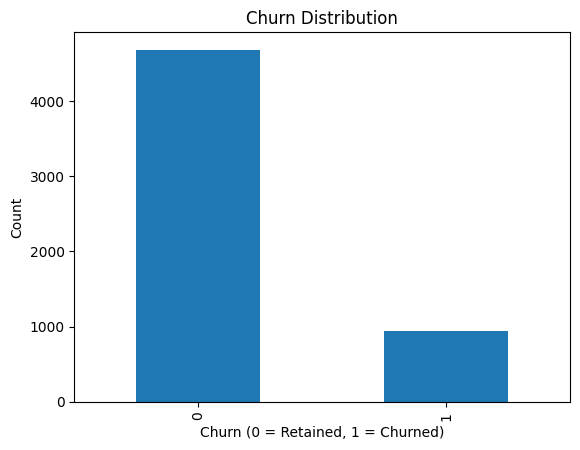

In [14]:
#EDA
df['Churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = Retained, 1 = Churned)")
plt.ylabel("Count")
plt.show()

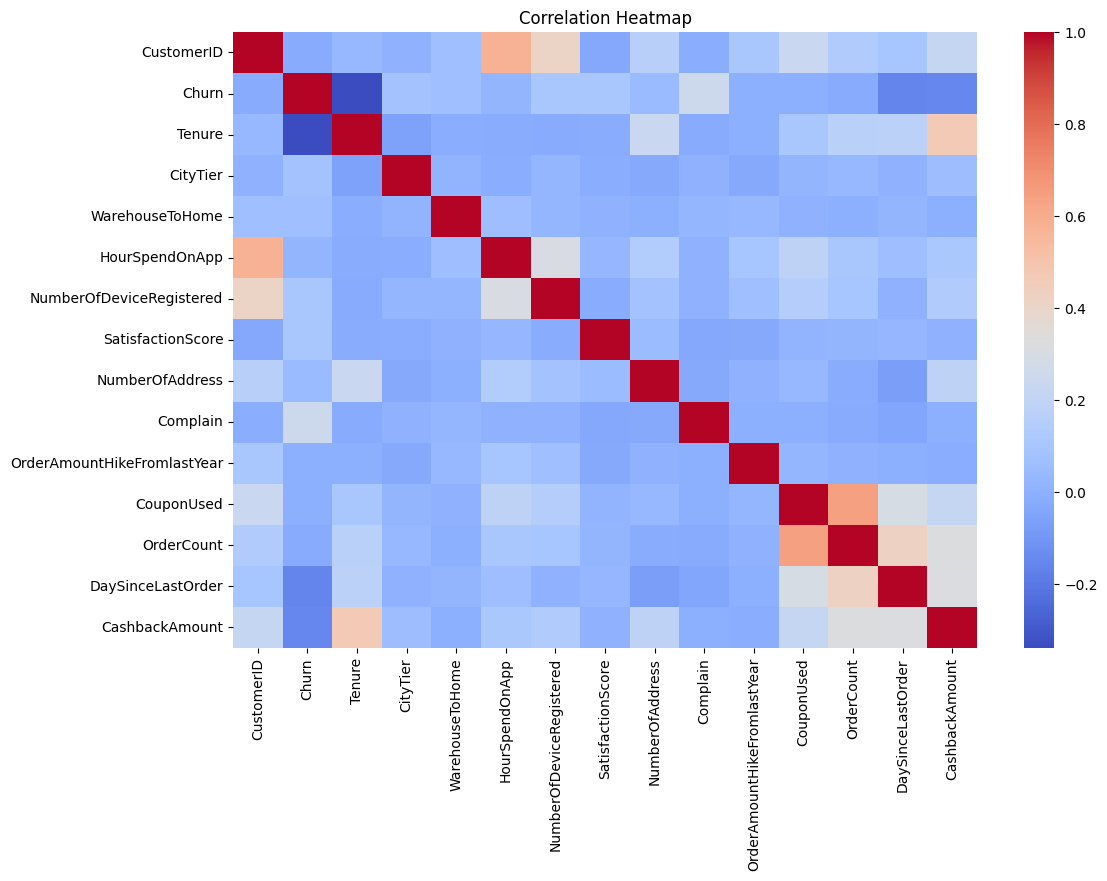

In [15]:
#correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

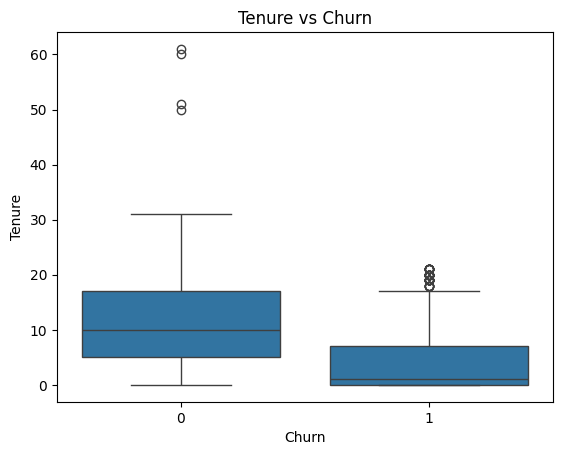

In [16]:
#churn vs tenure
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

In [17]:
#dropping unncessary column
df.drop(columns=['CustomerID'], inplace=True)

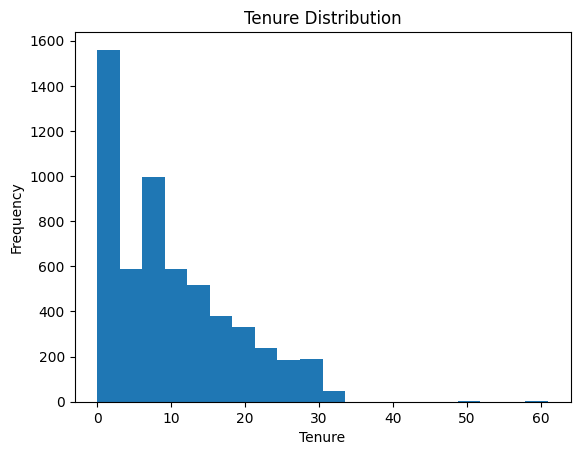

In [18]:
#Numerical Feature Distribution on Histogram
plt.hist(df['Tenure'], bins=20)
plt.title("Tenure Distribution")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.show()

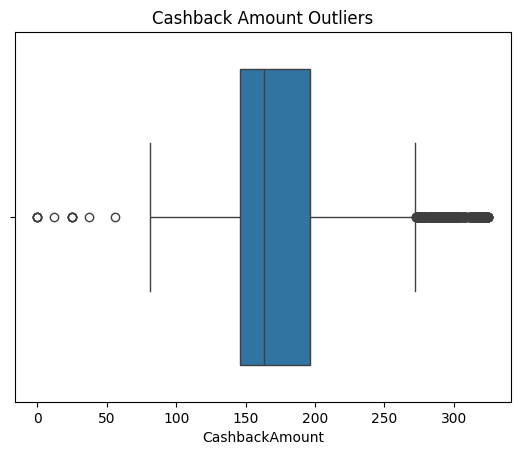

In [19]:
#outlier detection on cashamount
sns.boxplot(x=df['CashbackAmount'])
plt.title("Cashback Amount Outliers")
plt.show()

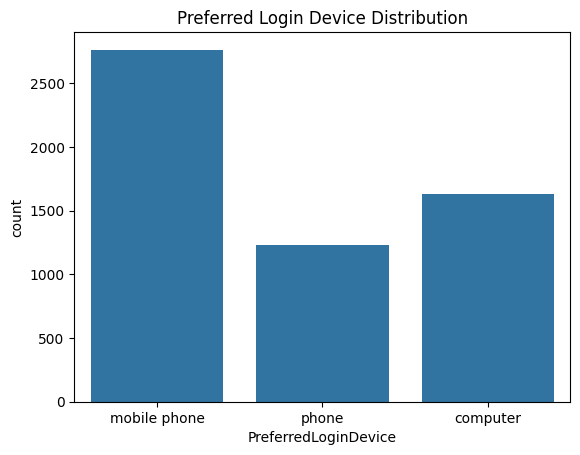

In [20]:
#categorial feature distribution on device login in
sns.countplot(x='PreferredLoginDevice', data=df)
plt.title("Preferred Login Device Distribution")
plt.xticks()
plt.show()

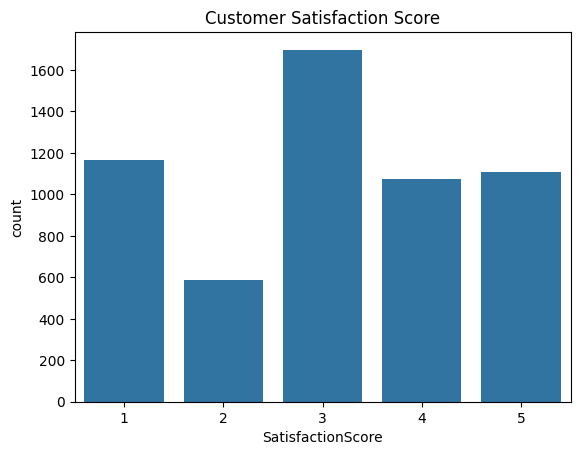

In [21]:
# eda of statisfaction score distibution
sns.countplot(x='SatisfactionScore', data=df)
plt.title("Customer Satisfaction Score")
plt.show()

In [22]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,mobile phone,3,6.0,debit card,female,3.0,3,laptop & accessory,2,single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,phone,1,8.0,upi,male,3.0,4,mobile,3,single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,phone,1,30.0,debit card,male,2.0,4,mobile,3,single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,phone,3,15.0,debit card,male,2.0,4,laptop & accessory,5,single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,phone,1,12.0,cc,male,3.0,3,mobile,5,single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,computer,1,30.0,credit card,male,3.0,2,laptop & accessory,1,married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,mobile phone,1,13.0,credit card,male,3.0,5,fashion,5,married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,mobile phone,1,11.0,debit card,male,3.0,2,laptop & accessory,4,married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,computer,3,9.0,credit card,male,4.0,5,laptop & accessory,4,married,4,0,15.0,2.0,2.0,9.0,178.90


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
#encoding the categorial variable
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
#spliting the target and feature
X = df.drop('Churn', axis=1)
y = df['Churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [27]:
#Feature scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#training model of logistic regression algo
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))

In [32]:
evaluate_model(lr, "Logistic Regression")
evaluate_model(dt, "Decision Tree")
evaluate_model(rf, "Random Forest")


Logistic Regression
Accuracy : 0.872113676731794
Precision: 0.6949152542372882
Recall   : 0.43157894736842106
F1-score : 0.5324675324675324

Decision Tree
Accuracy : 0.9591474245115453
Precision: 0.8564356435643564
Recall   : 0.9105263157894737
F1-score : 0.8826530612244898

Random Forest
Accuracy : 0.9822380106571936
Precision: 0.9775280898876404
Recall   : 0.9157894736842105
F1-score : 0.9456521739130435


In [33]:
#churn prediction
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

In [34]:
new_customer = pd.DataFrame({
    'Tenure': [2],
    'PreferredLoginDevice': [1],
    'CityTier': [3],
    'WarehouseToHome': [12],
    'PreferredPaymentMode': [2],
    'Gender': [1],
    'HourSpendOnApp': [2],
    'NumberOfDeviceRegistered': [1],
    'PreferedOrderCat': [3],
    'SatisfactionScore': [2],
    'MaritalStatus': [1],
    'NumberOfAddress': [2],
    'Complain': [1],
    'OrderAmountHikeFromlastYear': [10],
    'CouponUsed': [0],
    'OrderCount': [1],
    'DaySinceLastOrder': [15],
    'CashbackAmount': [120]
})

new_customer_scaled = scaler.transform(new_customer)

prediction = rf.predict(new_customer_scaled)
probability = rf.predict_proba(new_customer_scaled)[:,1]

print("Churn Prediction:", prediction[0])
print("Churn Probability:", probability[0])


Churn Prediction: 0
Churn Probability: 0.37


In [35]:
if prediction[0] == 1:
    print("Customer is likely to CHURN")
else:
    print("Customer is likely to STAY")

Customer is likely to STAY


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
y_pred_rf = rf.predict(X_test)
# Logistic Regression prediction
y_pred_lr = lr.predict(X_test)

# Decision Tree prediction
y_pred_dt = dt.predict(X_test)

# Random Forest prediction
y_pred_rf = rf.predict(X_test)

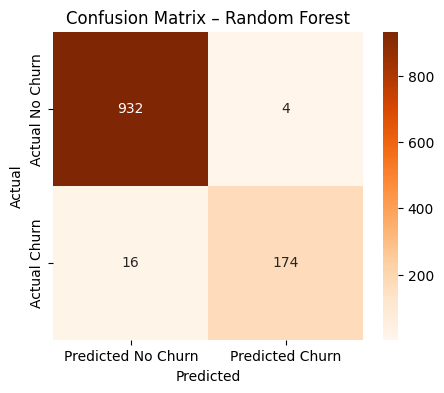

In [40]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt='d',
    cmap='Oranges',
    xticklabels=['Predicted No Churn', 'Predicted Churn'],
    yticklabels=['Actual No Churn', 'Actual Churn']
)
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


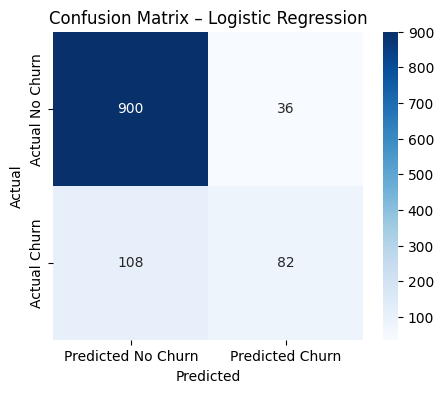

In [41]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted No Churn', 'Predicted Churn'],
    yticklabels=['Actual No Churn', 'Actual Churn']
)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


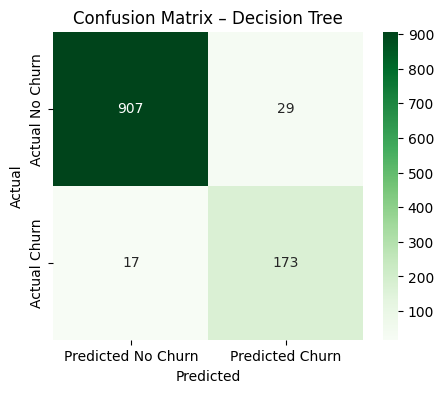

In [42]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_dt,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Predicted No Churn', 'Predicted Churn'],
    yticklabels=['Actual No Churn', 'Actual Churn']
)
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [50]:
from sklearn.metrics import roc_curve, auc

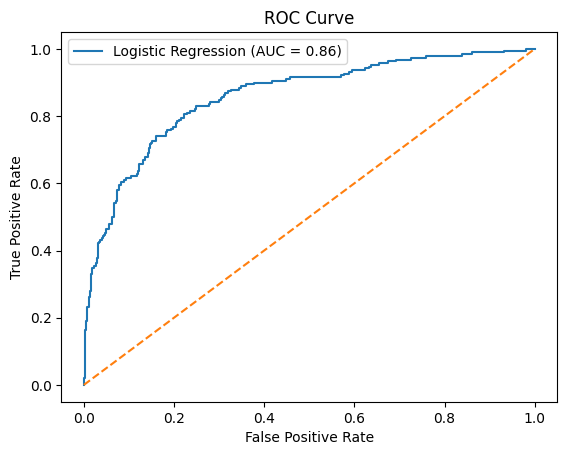

In [52]:
# Predict probabilities
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

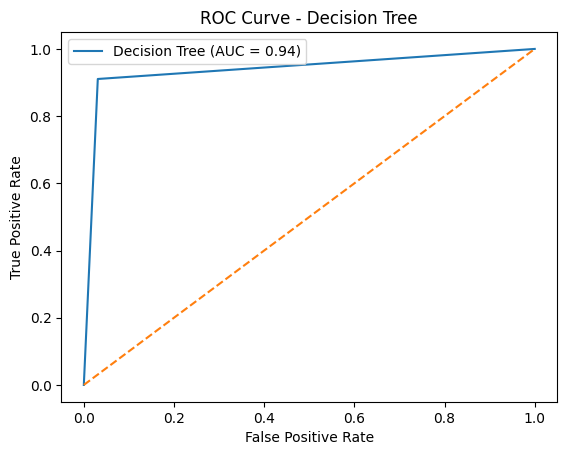

In [54]:
# Predict probabilities
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Compute AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

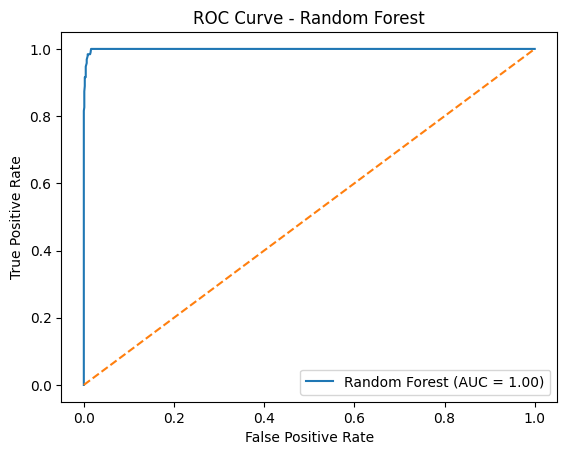

In [56]:
# Predict probabilities
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)

# Compute AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

In [57]:
from sklearn.metrics import classification_report

In [58]:
y_pred_lr = lr.predict(X_test)

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       936
           1       0.69      0.43      0.53       190

    accuracy                           0.87      1126
   macro avg       0.79      0.70      0.73      1126
weighted avg       0.86      0.87      0.86      1126



In [59]:
y_pred_dt = dt.predict(X_test)

print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred_dt))

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       936
           1       0.86      0.91      0.88       190

    accuracy                           0.96      1126
   macro avg       0.92      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126



In [60]:
y_pred_rf = rf.predict(X_test)

print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       936
           1       0.98      0.92      0.95       190

    accuracy                           0.98      1126
   macro avg       0.98      0.96      0.97      1126
weighted avg       0.98      0.98      0.98      1126



In [43]:
#doing prediction
newCustomer = pd.DataFrame({
    'Tenure': [2],
    'PreferredLoginDevice': [1],
    'CityTier': [2],
    'WarehouseToHome': [15],
    'PreferredPaymentMode': [2],
    'Gender': [1],
    'HourSpendOnApp': [2],
    'NumberOfDeviceRegistered': [1],
    'PreferedOrderCat': [3],
    'SatisfactionScore': [2],
    'MaritalStatus': [1],
    'NumberOfAddress': [1],
    'Complain': [1],
    'OrderAmountHikeFromlastYear': [10],
    'CouponUsed': [0],
    'OrderCount': [1],
    'DaySinceLastOrder': [18],
    'CashbackAmount': [110]
})


In [44]:
newCustomer_scaled = scaler.transform(new_customer)

In [45]:
#using logistic regression
lr_pred = lr.predict(new_customer_scaled)
lr_prob = lr.predict_proba(new_customer_scaled)[:,1]


In [46]:
#using decision tree
dt_pred = dt.predict(new_customer_scaled)
dt_prob = dt.predict_proba(new_customer_scaled)[:,1]

In [47]:
# using random forest
rf_pred = rf.predict(new_customer_scaled)
rf_prob = rf.predict_proba(new_customer_scaled)[:,1]

In [48]:
#showing the result together
prediction_results = pd.DataFrame({
    "Algorithm": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Predicted Churn": [lr_pred[0], dt_pred[0], rf_pred[0]],
    "Churn Probability": [
        round(lr_prob[0], 2),
        round(dt_prob[0], 2),
        round(rf_prob[0], 2)
    ]
})

prediction_results

,Algorithm,Predicted Churn,Churn Probability
0,Logistic Regression,0,0.09
1,Decision Tree,0,0.00
2,Random Forest,0,0.37


In [49]:
if prediction[0] == 1:
    print("Customer is likely to LEAVE")
else:
    print("Customer is likely to STAY")

Customer is likely to STAY
